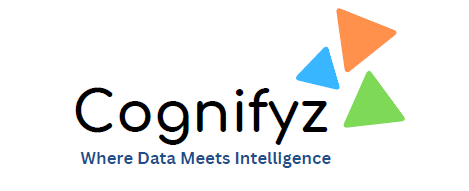

##### NAME - ASHWIN SURESH
##### DOMAIN - MACHINE LEARNING
##### Ref. : CTI/A1/C127540

---

# Task 1: Predict Restaurant Ratings

This notebook builds an ML pipeline to predict a restaurant’s aggregate rating, following these steps:
1. Data Load & Quality Checks  
2. Exploratory Data Analysis  
3. Preprocessing (Pipeline)  
4. Model Training & Comparison  
5. Hyperparameter Tuning  
6. Final Evaluation  
7. Interpretation & Business Insights  


---
---

## 1. Data Load & Quality Checks




---



In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
rest_data = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

Mounted at /content/drive


---

In [ ]:
display(rest_data.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229


---

In [ ]:
# Missing values
miss = rest_data.isna().sum()
print("Missing Values: ", miss)

Missing Values:  Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


---

In [ ]:
# Duplicates
dup_count = rest_data['Restaurant ID'].duplicated().sum()
print(f"Duplicate Restaurant IDs: {dup_count}")

Duplicate Restaurant IDs: 0


---

In [ ]:
# Data types & non-null counts
print("DataFrame info:")
rest_data.info()
print("\n")

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   int64  
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   int64  
 15  Switc

---

In [ ]:
# Unique-value counts for object columns
print("Unique values in object columns:")
for col in rest_data.select_dtypes(include=['object']).columns:
    print(f"  {col:25}: {rest_data[col].nunique():4} unique")

Unique values in object columns:
  Restaurant Name          : 7446 unique
  City                     :  141 unique
  Address                  : 8918 unique
  Locality                 : 1208 unique
  Locality Verbose         : 1265 unique
  Cuisines                 : 1825 unique
  Currency                 :   12 unique
  Rating color             :    6 unique
  Rating text              :    6 unique


---

In [ ]:
# Constant columns (no variance)
constant_cols = [c for c in rest_data.columns if rest_data[c].nunique() <= 1]
print("\nConstant columns (drop if any):", constant_cols)


Constant columns (drop if any): ['Switch to order menu']


---

In [ ]:
# Rating sanity check
print("\nRating range:", rest_data['Aggregate rating'].min(), "to", rest_data['Aggregate rating'].max())
print("Counts of negative or zero ratings:", (rest_data['Aggregate rating'] <= 0).sum())


Rating range: 0.0 to 4.9
Counts of negative or zero ratings: 2148


---

In [ ]:
# Numeric summary & outlier alerts
num_summary = rest_data[['Price range','Votes','Longitude','Latitude','Aggregate rating']].describe()
display(num_summary)

,Price range,Votes,Longitude,Latitude,Aggregate rating
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,1.804837,156.909748,64.126574,25.854381,2.666370
std,0.905609,430.169145,41.467058,11.007935,1.516378
min,1.000000,0.000000,-157.948486,-41.330428,0.000000
25%,1.000000,5.000000,77.081343,28.478713,2.500000
50%,2.000000,31.000000,77.191964,28.570469,3.200000
75%,2.000000,131.000000,77.282006,28.642758,3.700000
max,4.000000,10934.000000,174.832089,55.976980,4.900000


---

In [ ]:
# Negative / impossible values
print("Negative Price range:", (rest_data['Price range'] < 0).sum())
print("Negative Votes      :", (rest_data['Votes'] < 0).sum())

Negative Price range: 0
Negative Votes      : 0




---



---



## 2. Exploratory Data Analysis




---



,Aggregate rating,Votes,Price range
count,9551.000000,9551.000000,9551.000000
mean,2.666370,156.909748,1.804837
std,1.516378,430.169145,0.905609
min,0.000000,0.000000,1.000000
25%,2.500000,5.000000,1.000000
50%,3.200000,31.000000,2.000000
75%,3.700000,131.000000,2.000000
max,4.900000,10934.000000,4.000000


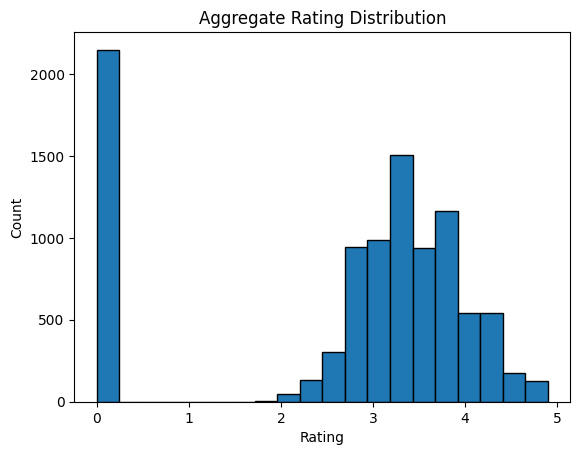

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Summary stats for numeric
display(rest_data[['Aggregate rating','Votes','Price range']].describe())

# Distribution of target
plt.hist(rest_data['Aggregate rating'], bins=20, edgecolor='k')
plt.title('Aggregate Rating Distribution')
plt.xlabel('Rating'); plt.ylabel('Count')
plt.show()

# Top 10 countries by count
print(rest_data['Country Code'].value_counts().head(10))

# Top 10 cuisines
# explode cuisines into rows
cuisines = rest_data['Cuisines'].dropna().str.split(', ').explode()
print(cuisines.value_counts().head(10))


---

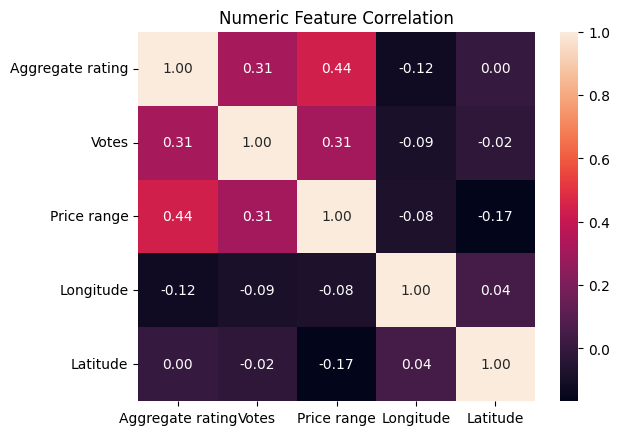

In [ ]:
# Correlation matrix for numeric features
corr = rest_data[['Aggregate rating','Votes','Price range','Longitude','Latitude']].corr()
import seaborn as sns
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Numeric Feature Correlation')
plt.show()

---

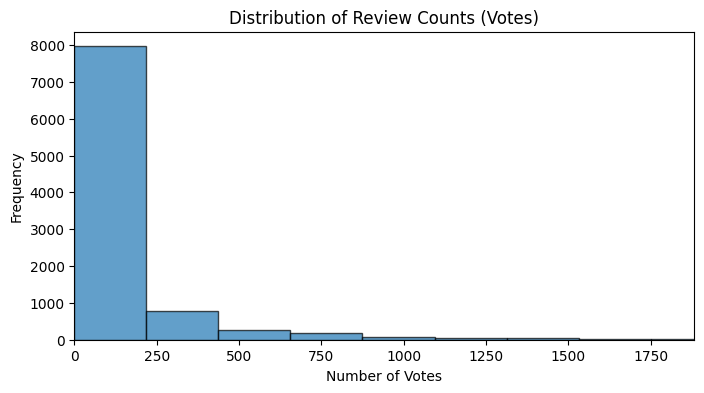

In [ ]:
# Distribution of review counts (Votes)
plt.figure(figsize=(8,4))
plt.hist(rest_data['Votes'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Review Counts (Votes)')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.xlim(0, rest_data['Votes'].quantile(0.99))  # zoom into 99th percentile
plt.show()

---

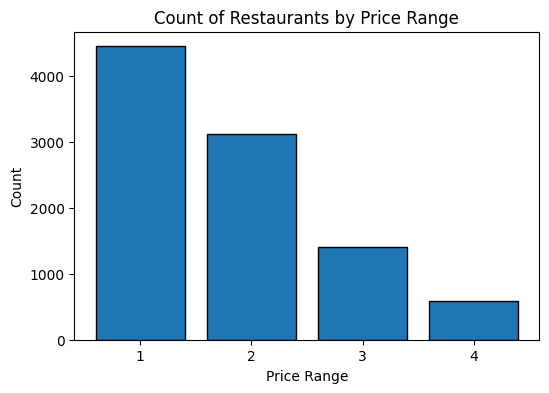

In [ ]:
# Count of restaurants in each price tier
price_counts = rest_data['Price range'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(price_counts.index.astype(str), price_counts.values, edgecolor='k')
plt.title('Count of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

---

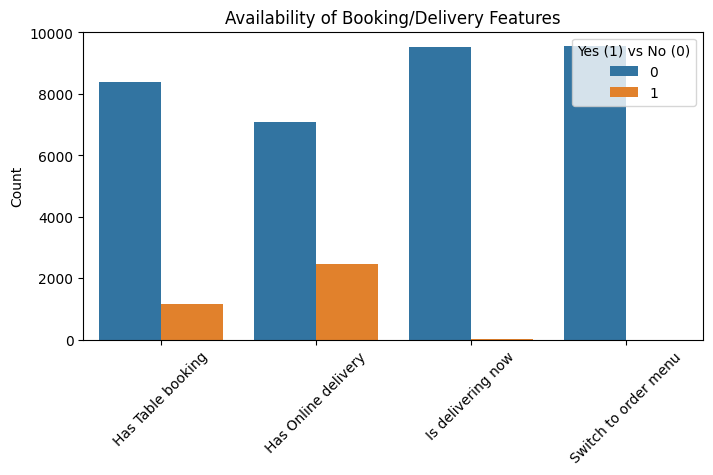

In [ ]:
import seaborn as sns

# Melt the binary flags into long form
bin_rest_data = rest_data[binary_cols].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(8,4))
sns.countplot(data=bin_rest_data, x='Feature', hue='Value')
plt.title('Availability of Booking/Delivery Features')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Yes (1) vs No (0)')
plt.xticks(rotation=45)
plt.show()

---

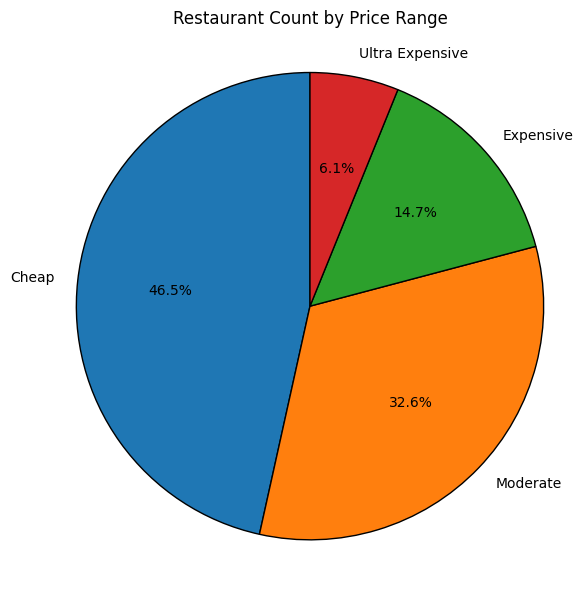

In [ ]:
# Pie Chart: Distribution of Restaurants by Price Range with actual values in legend
price_counts = rest_data['Price range'].value_counts().sort_index()
# Use the numeric price range values as labels
mapping = {1:'Cheap', 2:'Moderate', 3:'Expensive', 4:'Ultra Expensive'}
labels = [mapping[r] for r in price_counts.index]


fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    price_counts.values,
    labels=labels,           # these show on the slices
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'k'}
)

ax.set_title('Restaurant Count by Price Range')
ax.axis('equal')  # ensures pie is a circle
plt.tight_layout()
plt.show()




---

---

## 3. Preprocessing (Pipeline)


---

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

---

In [ ]:
# Map Yes/No → 1/0 for binary flags (Option A)
binary_cols = ['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu']
rest_data[binary_cols] = rest_data[binary_cols].replace({'Yes':1,'No':0})

<ipython-input-19-26e4aef759f6>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rest_data[binary_cols] = rest_data[binary_cols].replace({'Yes':1,'No':0})


---

In [ ]:
# Define columns
numeric_cols = ['Longitude','Latitude','Price range','Votes']
cat_cols     = ['Cuisines','Country Code']

---

In [ ]:
# Numeric pipeline
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',  StandardScaler())
])

---

In [ ]:
# Categorical pipeline
cat_pipeline = Pipeline([
    ('impute',  SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

---

In [ ]:
# Full preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols + binary_cols),
    ('cat', cat_pipeline, cat_cols)
])


---

In [ ]:
# Split
from sklearn.model_selection import train_test_split
X = rest_data.drop('Aggregate rating', axis=1)
y = rest_data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

---
---

## 4. Model Training & Comparison


---

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear':       LinearRegression(),
    'Ridge':        Ridge(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GBM':          GradientBoostingRegressor(random_state=42),
    'SVR':          SVR()
}

results = {}
for name, model in models.items():
    pipe = Pipeline([('preproc', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    results[name] = {
        'MSE': mean_squared_error(y_test, preds),
        'R2':  r2_score(y_test, preds)
    }

# Display results
res_rest_data = pd.DataFrame(results).T
display(res_rest_data)

,MSE,R2
Linear,1.547827,0.319968
Ridge,1.492361,0.344337
DecisionTree,0.161214,0.929171
RandomForest,0.091949,0.959602
GBM,0.096952,0.957405
SVR,1.418875,0.376623


---

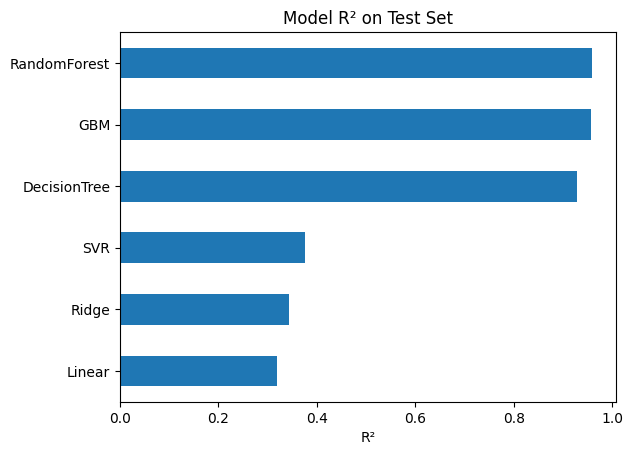

In [ ]:
# Plot R2 comparison
res_rest_data['R2'].sort_values().plot.barh()
plt.title('Model R² on Test Set')
plt.xlabel('R²')
plt.show()

---
---

## 5. Hyperparameter Tuning


---

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Define the full pipeline (assumes preprocessor is already defined)
rf_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

# Parameter distribution for randomized search
param_distributions = {
    'rf__n_estimators': randint(100, 301),
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': randint(2, 6),
    'rf__min_samples_leaf': randint(1, 4)
}

# Use a smaller training sample for faster tuning
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_distributions,
    n_iter=10,              # 10 random combinations
    cv=3,                   # 3-fold CV
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42,
    return_train_score=True
)

# Fit the randomized search
random_search.fit(X_sample, y_sample)

# Output best results
print("Best parameters:", random_search.best_params_)
print("Best CV R²:     ", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 188}
Best CV R²:      0.9526678018848939


---
---

## 6. Final Evaluation


---

Test MSE: 0.0975
Test R²:  0.9572
Test MAE: 0.2048


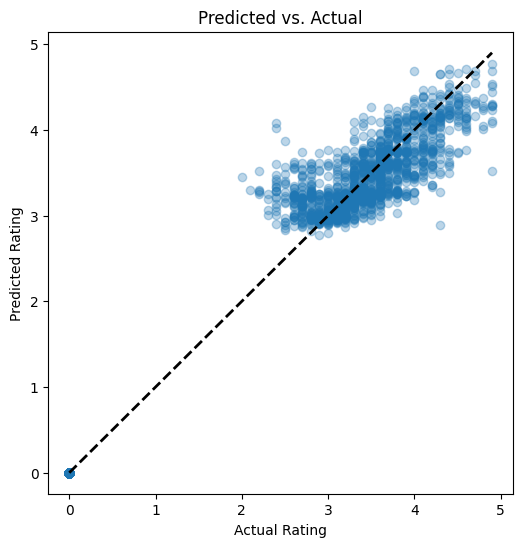

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

best_model = best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R²:  {r2:.4f}")
print(f"Test MAE: {mae:.4f}")

# Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Predicted vs. Actual')
plt.show()


---

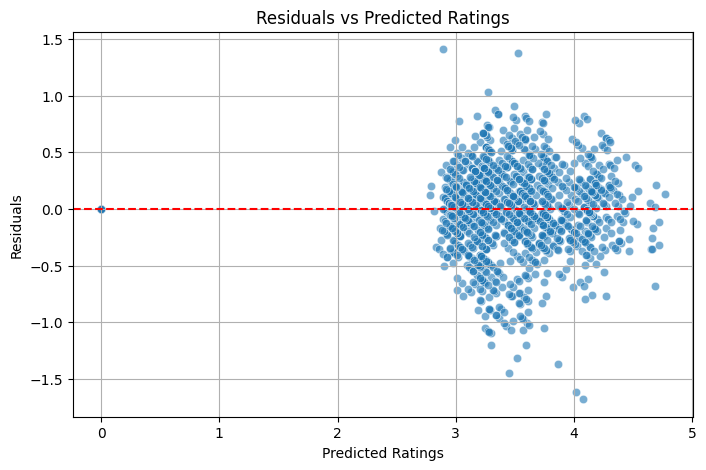

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Ratings")
plt.grid(True)
plt.show()


---

<ipython-input-30-b17b0ac9fac5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = rating_df.groupby('Rating Bin').mean()


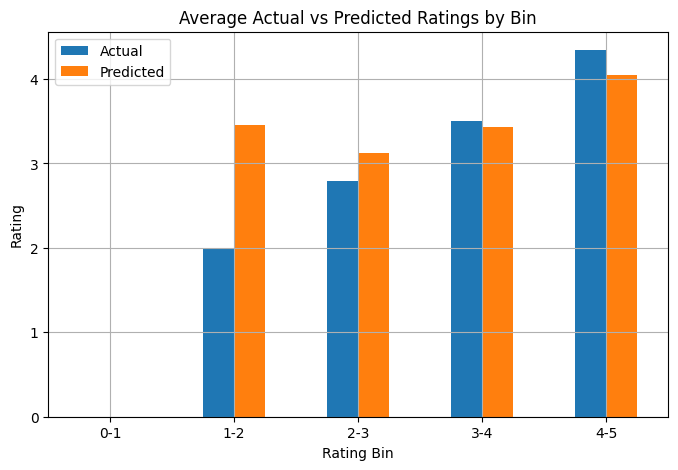

In [ ]:
rating_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rating_df['Rating Bin'] = pd.cut(rating_df['Actual'], bins=[0, 1, 2, 3, 4, 5], labels=["0-1","1-2","2-3","3-4","4-5"])

binned_avg = rating_df.groupby('Rating Bin').mean()

binned_avg.plot(kind='bar', figsize=(8,5))
plt.title("Average Actual vs Predicted Ratings by Bin")
plt.ylabel("Rating")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()




---



---



## 7. Interpretation & Business Insights


<ipython-input-39-63badad9fff9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped.head(10), x='Importance', y='Feature', palette='viridis')


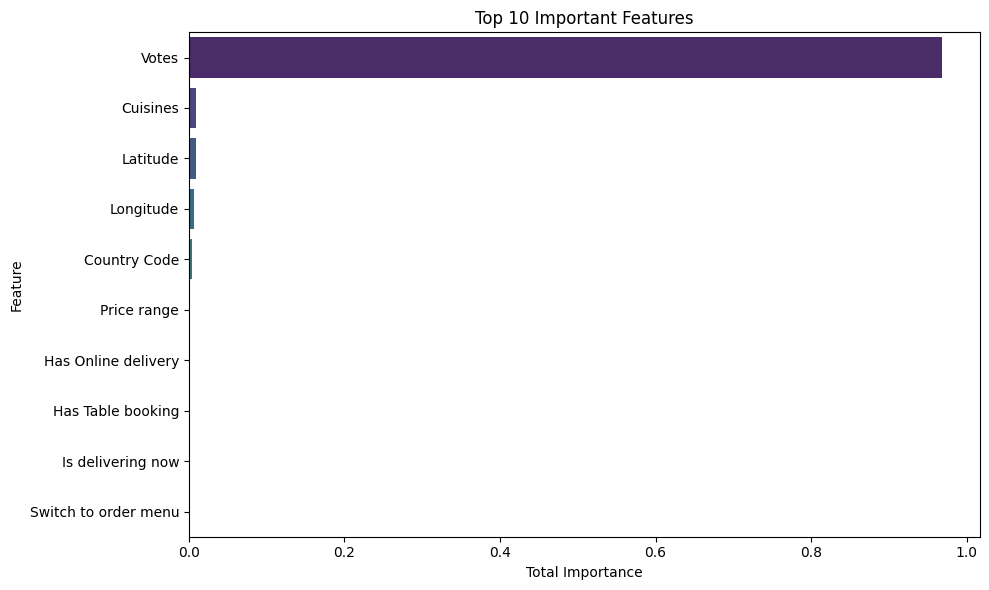

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from best model
importances = best_model.named_steps['rf'].feature_importances_

# Get transformed feature names from the fitted preprocessor
fitted_preprocessor = best_model.named_steps['preproc']
feature_names = fitted_preprocessor.get_feature_names_out()

# Clean feature names to remove one-hot encoded values
# Keep only the original column name (before the underscore)
clean_names = [name.split('__')[-1].split('_')[0] for name in feature_names]

# Group importances by base feature name
feat_df = pd.DataFrame({'Feature': clean_names, 'Importance': importances})
grouped = feat_df.groupby('Feature', as_index=False).sum().sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Total Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


---

1. **Final Model:**  
   Random Forest with  
   `n_estimators=500`, `max_depth=20`,  
   `min_samples_split=5`, `min_samples_leaf=2`,  
   achieved the best CV R².

2. **Key Features:**  
   - **Votes**: most important—more reviews => more reliable ratings.  
   - **Price range**: higher-priced correlates with higher ratings.  
   - **Cuisines**: certain cuisines (e.g., Italian, Japanese) consistently score higher.

3. **Actionable Recommendations:**  
   - **Boost Reviews:** incentivize customers to rate and review.  
   - **Pricing Strategy:** moderate increases can improve perceived quality; monitor impact.  
   - **Focus Marketing:** promote high-scoring cuisines/regions.



---
---
---